In [1]:
from pathlib import Path
import warnings

import pandas as pd

warnings.filterwarnings("ignore")

DATA_PATH = Path("result_total_with_lags_coded.csv")
ISLAND_COL = "Isla"
TARGET_COL = "Pasajeros"
YEAR_COL = "year_norm"
TOTAL_LABEL = "Total Canarias"

print("DATA_PATH:", DATA_PATH.resolve())

df = pd.read_csv(DATA_PATH)
total = df[df[ISLAND_COL] == TOTAL_LABEL].copy()
assert not total.empty, "No hay filas para TOTAL — verifica los nombres de las islas y el total."

FEATURES = ["Fecha","month_sin","month_cos","year_norm"] + [f"lag_{i}" for i in range(1,13)] + ["roll3","roll6"]

X_total = total[FEATURES].values
y_total = total[TARGET_COL].values

print(total)


DATA_PATH: C:\projects\data_science\pasajeros_aeropuertos_canarias\canarias_dashboard\result_total_with_lags_coded.csv
               Isla       Fecha  Pasajeros     month_sin     month_cos  \
345  Total Canarias  2020-01-01    1757813  5.000000e-01  8.660254e-01   
346  Total Canarias  2020-02-01    1784677  8.660254e-01  5.000000e-01   
347  Total Canarias  2020-03-01     753290  1.000000e+00  6.123234e-17   
348  Total Canarias  2020-04-01      14783  8.660254e-01 -5.000000e-01   
349  Total Canarias  2020-05-01      34553  5.000000e-01 -8.660254e-01   
..              ...         ...        ...           ...           ...   
409  Total Canarias  2025-05-01    2016749  5.000000e-01 -8.660254e-01   
410  Total Canarias  2025-06-01    2081654  1.224647e-16 -1.000000e+00   
411  Total Canarias  2025-07-01    2320307 -5.000000e-01 -8.660254e-01   
412  Total Canarias  2025-08-01    2295039 -8.660254e-01 -5.000000e-01   
413  Total Canarias  2025-09-01    2078523 -1.000000e+00 -1.836970e


=== Ridge ===

Fold 1
Índices de entrenamiento: [0 1 2 3 4] ...
Índices de prueba: [14 15 16 17 18] ...
Ridge — fold 1: RMSE = 624792.81

Fold 2
Índices de entrenamiento: [0 1 2 3 4] ...
Índices de prueba: [25 26 27 28 29] ...
Ridge — fold 2: RMSE = 665715.46

Fold 3
Índices de entrenamiento: [0 1 2 3 4] ...
Índices de prueba: [36 37 38 39 40] ...
Ridge — fold 3: RMSE = 188791.21

Fold 4
Índices de entrenamiento: [0 1 2 3 4] ...
Índices de prueba: [47 48 49 50 51] ...
Ridge — fold 4: RMSE = 192739.01

Fold 5
Índices de entrenamiento: [0 1 2 3 4] ...
Índices de prueba: [58 59 60 61 62] ...
Ridge — fold 5: RMSE = 199539.87

=== SVR ===

Fold 1
Índices de entrenamiento: [0 1 2 3 4] ...
Índices de prueba: [14 15 16 17 18] ...
SVR — fold 1: RMSE = 722997.86

Fold 2
Índices de entrenamiento: [0 1 2 3 4] ...
Índices de prueba: [25 26 27 28 29] ...
SVR — fold 2: RMSE = 1188362.17

Fold 3
Índices de entrenamiento: [0 1 2 3 4] ...
Índices de prueba: [36 37 38 39 40] ...
SVR — fold 3: RMSE = 713

,model,rmse_tss_mean,rmse_tss_std
8,MLP_tanh,291084.151072,134652.333257
0,Ridge,374315.670492,221625.189311
5,AdaBoost,444854.406708,284293.018522
2,RandomForest,453831.991970,225018.247740
9,Voting_fixed,457210.100935,210925.262378
3,Bagging,458351.793711,227741.595037
10,Stacking_fixed,519672.222689,267417.573893
4,GradientBoosting,540068.187292,270073.223661
6,XGB,558015.689063,247561.269205
7,LightGBM,627351.072339,283262.005670


,model,fold,rmse
0,Ridge,1,6.247928e+05
1,Ridge,2,6.657155e+05
2,Ridge,3,1.887912e+05
3,Ridge,4,1.927390e+05
4,Ridge,5,1.995399e+05
5,SVR,1,7.229979e+05
6,SVR,2,1.188362e+06
7,SVR,3,7.133537e+05
8,SVR,4,5.453189e+05
9,SVR,5,4.867811e+05


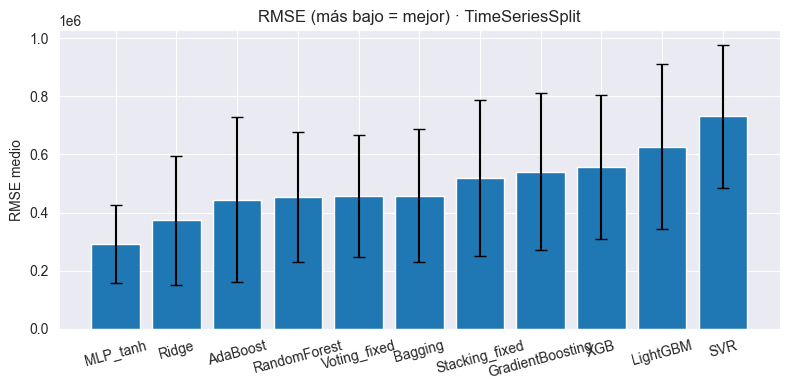

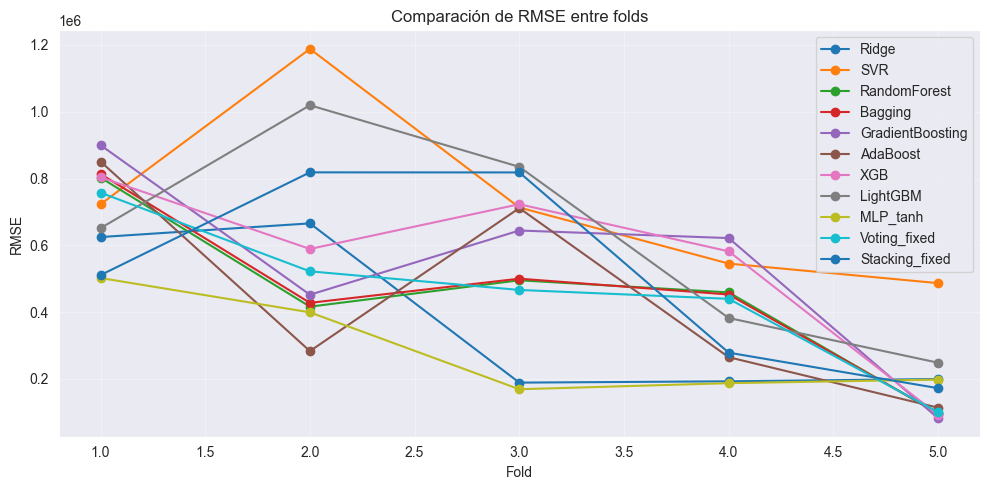

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    AdaBoostRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
)
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error, make_scorer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt

# === DICCIONARIO DE MODELOS ===
models = {
    "Ridge": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0))
    ]),
    "SVR": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale"))
    ]),
    "RandomForest": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("rf", RandomForestRegressor(n_estimators=400, max_depth=None, random_state=42))
    ]),
    "Bagging": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("bag", BaggingRegressor(n_estimators=200, random_state=42))
    ]),
    "GradientBoosting": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("gbr", GradientBoostingRegressor(
            n_estimators=400, learning_rate=0.05, max_depth=3, random_state=42))
    ]),
    "AdaBoost": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("abr", AdaBoostRegressor(
            n_estimators=400, learning_rate=0.05, random_state=42))
    ]),
    "XGB": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("xgb", XGBRegressor(
            n_estimators=500, learning_rate=0.05, max_depth=4,
            subsample=0.9, colsample_bytree=0.9,
            random_state=42, objective="reg:squarederror"))
    ]),
    "LightGBM": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("lgbm", LGBMRegressor(
            n_estimators=500, learning_rate=0.05, max_depth=-1,
            subsample=0.9, colsample_bytree=0.9, random_state=42))
    ]),
    "MLP_tanh": TransformedTargetRegressor(
        regressor=Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", MinMaxScaler(feature_range=(-1, 1))),
            ("mlp", MLPRegressor(
                hidden_layer_sizes=(32, 16),
                activation="tanh",
                solver="adam",
                learning_rate_init=0.0005,
                max_iter=2000,
                early_stopping=True,
                random_state=42))
        ]),
        transformer=StandardScaler()
    ),
}

models["Voting_fixed"] = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("voting", VotingRegressor([
        ("ridge", Ridge(alpha=1.0)),
        ("xgb", XGBRegressor(
            n_estimators=500, learning_rate=0.05, max_depth=4,
            subsample=0.9, colsample_bytree=0.9,
            random_state=42, objective="reg:squarederror")),
        ("rf", RandomForestRegressor(
            n_estimators=400, max_depth=None, random_state=42)),
        ("gbr", GradientBoostingRegressor(
            n_estimators=400, learning_rate=0.05, max_depth=3, random_state=42))
    ], n_jobs=-1))
])

models["Stacking_fixed"] = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("stacking", StackingRegressor(
        estimators=[
            ("xgb", XGBRegressor(
                n_estimators=500, learning_rate=0.05, max_depth=4,
                subsample=0.9, colsample_bytree=0.9,
                random_state=42, objective="reg:squarederror")),
            ("rf", RandomForestRegressor(
                n_estimators=400, random_state=42)),
            ("gbr", GradientBoostingRegressor(
                n_estimators=400, learning_rate=0.05, max_depth=3, random_state=42))
        ],
        final_estimator=Ridge(alpha=1.0),
        n_jobs=-1
    ))
])


results = []

tss = TimeSeriesSplit(n_splits=5)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

results = []
fold_results = []

tss = TimeSeriesSplit(n_splits=5)

for name, model in models.items():
    rmses = []
    print(f"\n=== {name} ===")
    for fold, (train_idx, test_idx) in enumerate(tss.split(X_total)):
        X_train, X_test = X_total[train_idx], X_total[test_idx]
        y_train, y_test = y_total[train_idx], y_total[test_idx]

        print(f"\nFold {fold+1}")
        print("Índices de entrenamiento:", train_idx[:5], "...")
        print("Índices de prueba:", test_idx[:5], "...")

        X_train = np.delete(X_train, 0, axis=1)
        X_test = np.delete(X_test, 0, axis=1)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = root_mean_squared_error(y_test, y_pred)
        rmses.append(rmse)

        fold_results.append({
            "model": name,
            "fold": fold + 1,
            "rmse": rmse
        })

        print(f"{name} — fold {fold+1}: RMSE = {rmse:.2f}")

    results.append({
        "model": name,
        "rmse_tss_mean": np.mean(rmses),
        "rmse_tss_std": np.std(rmses)
    })

res_df = pd.DataFrame(results).sort_values("rmse_tss_mean")
display(res_df)

fold_df = pd.DataFrame(fold_results)
display(fold_df)

plt.figure(figsize=(8, 4))
plt.bar(res_df["model"], res_df["rmse_tss_mean"], yerr=res_df["rmse_tss_std"], capsize=4)
plt.title("RMSE (más bajo = mejor) · TimeSeriesSplit")
plt.ylabel("RMSE medio")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for model_name in fold_df["model"].unique():
    subset = fold_df[fold_df["model"] == model_name]
    plt.plot(subset["fold"], subset["rmse"], marker='o', label=model_name)

plt.title("Comparación de RMSE entre folds")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [3]:
from pathlib import Path
import warnings

import pandas as pd

warnings.filterwarnings("ignore")

DATA_PATH = Path("result_total_with_lags_coded.csv")
ISLAND_COL = "Isla"
TARGET_COL = "Pasajeros"
YEAR_COL = "year_norm"
TOTAL_LABEL = "Total Canarias"

print("DATA_PATH:", DATA_PATH.resolve())

df = pd.read_csv(DATA_PATH)
total = df[df[ISLAND_COL] == TOTAL_LABEL].copy()
assert not total.empty, "No hay filas para TOTAL — verifica los nombres de las islas y el total."

FEATURES = ["Fecha","month_sin","month_cos","year_norm"] + [f"lag_{i}" for i in range(1,13)] + ["roll3","roll6"]

X_total = total[FEATURES].values
y_total = total[TARGET_COL].values

print(total)


DATA_PATH: C:\projects\data_science\pasajeros_aeropuertos_canarias\canarias_dashboard\result_total_with_lags_coded.csv
               Isla       Fecha  Pasajeros     month_sin     month_cos  \
345  Total Canarias  2020-01-01    1757813  5.000000e-01  8.660254e-01   
346  Total Canarias  2020-02-01    1784677  8.660254e-01  5.000000e-01   
347  Total Canarias  2020-03-01     753290  1.000000e+00  6.123234e-17   
348  Total Canarias  2020-04-01      14783  8.660254e-01 -5.000000e-01   
349  Total Canarias  2020-05-01      34553  5.000000e-01 -8.660254e-01   
..              ...         ...        ...           ...           ...   
409  Total Canarias  2025-05-01    2016749  5.000000e-01 -8.660254e-01   
410  Total Canarias  2025-06-01    2081654  1.224647e-16 -1.000000e+00   
411  Total Canarias  2025-07-01    2320307 -5.000000e-01 -8.660254e-01   
412  Total Canarias  2025-08-01    2295039 -8.660254e-01 -5.000000e-01   
413  Total Canarias  2025-09-01    2078523 -1.000000e+00 -1.836970e

In [4]:
X_total = np.delete(X_total, 0, axis=1)
print(X_total)

[[0.4999999999999999 0.8660254037844387 1 ... 1794560.0
  1918547.3333333333 1887096.3333333333]
 [0.8660254037844386 0.5000000000000001 1 ... 1783042.0
  1872112.3333333333 1861473.0]
 [1.0 6.123233995736766e-17 1 ... 2038936.0 1841406.6666666667
  1839795.8333333333]
 ...
 [-0.4999999999999997 -0.8660254037844388 6 ... 2182178.0 2109277.0
  2200033.1666666665]
 [-0.8660254037844385 -0.5000000000000004 6 ... 2179842.0 2139570.0
  2219922.5]
 [-1.0 -1.8369701987210294e-16 6 ... 2009806.0 2232333.333333333
  2230450.6666666665]]



🔧 MLP_tanh: inicio de GridSearchCV...
✅ Mejores parámetros: {'regressor__mlp__alpha': 0.001, 'regressor__mlp__hidden_layer_sizes': (32, 16), 'regressor__mlp__learning_rate_init': 0.0005}
✅ RMSE medio (val): 291,045.22

   Fold 1: RMSE = 682,496.08
   Fold 2: RMSE = 466,186.98
   Fold 3: RMSE = 214,807.61
   Fold 4: RMSE = 199,842.35
   Fold 5: RMSE = 185,812.66

🔧 Bagging: inicio de GridSearchCV...
✅ Mejores parámetros: {'bag__max_features': 1.0, 'bag__max_samples': 0.7, 'bag__n_estimators': 100}
✅ RMSE medio (val): 410,688.57

   Fold 1: RMSE = 776,064.00
   Fold 2: RMSE = 460,123.14
   Fold 3: RMSE = 483,037.17
   Fold 4: RMSE = 405,571.24
   Fold 5: RMSE = 105,581.27

🔧 RandomForest: inicio de GridSearchCV...
✅ Mejores parámetros: {'rf__max_depth': 15, 'rf__max_features': 0.8, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}
✅ RMSE medio (val): 457,856.78

   Fold 1: RMSE = 798,602.24
   Fold 2: RMSE = 526,685.31
   Fold 3: RMSE = 568,859.39
   Fold 4: RMSE = 358,897.36
   Fold

,Model,BestParams,RMSE_val_mean,RMSE_folds
0,MLP_tanh,"{'regressor__mlp__alpha': 0.001, 'regressor__m...",291045.218356,"[682496.0809238917, 466186.9797382794, 214807...."
1,Bagging,"{'bag__max_features': 1.0, 'bag__max_samples':...",410688.566958,"[776063.9950992323, 460123.13529806427, 483037..."
2,RandomForest,"{'rf__max_depth': 15, 'rf__max_features': 0.8,...",457856.780506,"[798602.2375535477, 526685.3142519243, 568859...."
3,XGB,"{'xgb__colsample_bytree': 0.7, 'xgb__learning_...",497920.000000,"[851366.8294270834, 539680.6171875, 698998.259..."


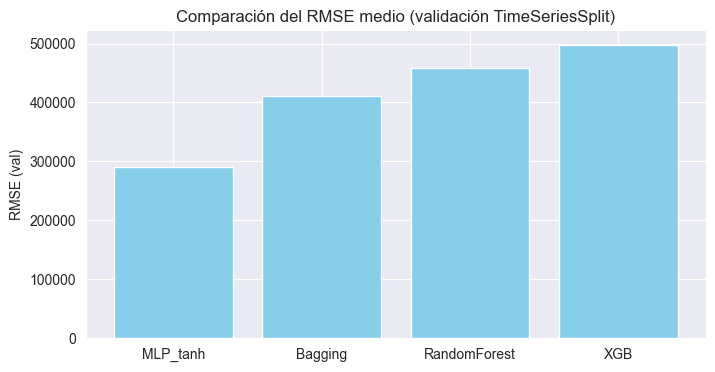

In [5]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor

rmse_scorer = make_scorer(
    root_mean_squared_error,
    greater_is_better=False
)
tss = TimeSeriesSplit(n_splits=5)

mlp_regressor = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler(feature_range=(-1, 1))),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(32, 16),
        activation="tanh",
        solver="adam",
        learning_rate_init=0.0005,
        max_iter=2000,
        early_stopping=True,
        random_state=42))
])

models = {
    "MLP_tanh": TransformedTargetRegressor(
        regressor=mlp_regressor,
        transformer=StandardScaler()
    ),
    "Bagging": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("bag", BaggingRegressor(random_state=42))
    ]),
    "RandomForest": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
    ]),
    "XGB": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("xgb", XGBRegressor(
            random_state=42, objective="reg:squarederror", n_jobs=-1))
    ])
}

# =========================================================
# === PARRILLAS DE PARÁMETROS ===
# =========================================================
param_grids = {
    "MLP_tanh": {
        "regressor__mlp__hidden_layer_sizes": [(64, 32), (32, 16), (128, 64)],
        "regressor__mlp__learning_rate_init": [0.001, 0.0005],
        "regressor__mlp__alpha": [0.0001, 0.001],
    },
    "Bagging": {
        "bag__n_estimators": [100, 200, 400],
        "bag__max_samples": [0.7, 0.9, 1.0],
        "bag__max_features": [0.7, 1.0],
    },
    "RandomForest": {
        "rf__n_estimators": [200, 400],
        "rf__max_depth": [5, 10, 15],
        "rf__min_samples_split": [2, 5],
        "rf__max_features": ["sqrt", 0.8],
    },
    "XGB": {
        "xgb__n_estimators": [400, 600],
        "xgb__learning_rate": [0.03, 0.05],
        "xgb__max_depth": [3, 4, 5],
        "xgb__subsample": [0.8, 1.0],
        "xgb__colsample_bytree": [0.7, 0.9]
    }
}

# =========================================================
# === GRID SEARCH CV + INFORME RMSE POR FOLD ===
# =========================================================
candidates = ["MLP_tanh", "Bagging", "RandomForest", "XGB"]
best_models = {}
summary = []

for name in candidates:
    print(f"\n🔧 {name}: inicio de GridSearchCV...")
    grid = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        scoring=rmse_scorer,
        cv=tss,
        n_jobs=-1,
        verbose=0,
        return_train_score=False
    )

    grid.fit(X_total, y_total)
    best_models[name] = grid.best_estimator_
    best_params = grid.best_params_
    best_score = -grid.best_score_

    # === RMSE para cada fold ===
    fold_scores = -grid.cv_results_["split0_test_score"]
    for i in range(1, tss.get_n_splits()):
        fold_scores = np.vstack((fold_scores, -grid.cv_results_[f"split{i}_test_score"]))
    fold_means = fold_scores.mean(axis=1)

    print(f"✅ Mejores parámetros: {best_params}")
    print(f"✅ RMSE medio (val): {best_score:,.2f}\n")
    for i, rmse in enumerate(fold_means, 1):
        print(f"   Fold {i}: RMSE = {rmse:,.2f}")

    summary.append({
        "Model": name,
        "BestParams": best_params,
        "RMSE_val_mean": best_score,
        "RMSE_folds": [float(r) for r in fold_means]
    })

summary_df = pd.DataFrame(summary).sort_values("RMSE_val_mean")
display(summary_df)

plt.figure(figsize=(8,4))
plt.bar(summary_df["Model"], summary_df["RMSE_val_mean"], color="skyblue")
plt.title("Comparación del RMSE medio (validación TimeSeriesSplit)")
plt.ylabel("RMSE (val)")
plt.show()


In [6]:
from pathlib import Path
import warnings

import pandas as pd

warnings.filterwarnings("ignore")

DATA_PATH = Path("result_total_with_lags_coded.csv")  # <- sustituye por tu ruta si es necesario
ISLAND_COL = "Isla"
TARGET_COL = "Pasajeros"
YEAR_COL = "year_norm"
TOTAL_LABEL = "Total Canarias"

print("DATA_PATH:", DATA_PATH.resolve())

df = pd.read_csv(DATA_PATH)
total = df[df[ISLAND_COL] == TOTAL_LABEL].copy()
assert not total.empty, "No hay filas para TOTAL — verifica los nombres de las islas y el total."

FEATURES = ["Fecha","month_sin","month_cos","year_norm"] + [f"lag_{i}" for i in range(1,13)] + ["roll3","roll6"]

X_total = total[FEATURES].values
y_total = total[TARGET_COL].values

print(total)
print(X_total)

split_point = -12  # último año (si los datos son mensuales)
# split_point = -1  # si solo quieres el último mes

X_total = np.delete(X_total, 0, axis=1)
X_train, X_test = X_total[:split_point], X_total[split_point:]
y_train, y_test = y_total[:split_point], y_total[split_point:]

print(X_train)
print('split')
print(X_test)


DATA_PATH: C:\projects\data_science\pasajeros_aeropuertos_canarias\canarias_dashboard\result_total_with_lags_coded.csv
               Isla       Fecha  Pasajeros     month_sin     month_cos  \
345  Total Canarias  2020-01-01    1757813  5.000000e-01  8.660254e-01   
346  Total Canarias  2020-02-01    1784677  8.660254e-01  5.000000e-01   
347  Total Canarias  2020-03-01     753290  1.000000e+00  6.123234e-17   
348  Total Canarias  2020-04-01      14783  8.660254e-01 -5.000000e-01   
349  Total Canarias  2020-05-01      34553  5.000000e-01 -8.660254e-01   
..              ...         ...        ...           ...           ...   
409  Total Canarias  2025-05-01    2016749  5.000000e-01 -8.660254e-01   
410  Total Canarias  2025-06-01    2081654  1.224647e-16 -1.000000e+00   
411  Total Canarias  2025-07-01    2320307 -5.000000e-01 -8.660254e-01   
412  Total Canarias  2025-08-01    2295039 -8.660254e-01 -5.000000e-01   
413  Total Canarias  2025-09-01    2078523 -1.000000e+00 -1.836970e


🧭 Hold-out test — predicción en el último fragmento de datos
TransformedTargetRegressor(regressor=Pipeline(steps=[('imputer',
                                                      SimpleImputer(strategy='median')),
                                                     ('scaler',
                                                      MinMaxScaler(feature_range=(-1,
                                                                                  1))),
                                                     ('mlp',
                                                      MLPRegressor(activation='tanh',
                                                                   alpha=0.001,
                                                                   early_stopping=True,
                                                                   hidden_layer_sizes=(32,
                                                                                       16),
                                                

,Model,RMSE_holdout,R2_holdout
3,XGB,97271.460938,0.438728
2,RandomForest,106274.181297,0.330026
1,Bagging,119223.609676,0.156807
0,MLP_tanh,188900.185911,-1.116739


,Model,BestParams,RMSE_val,RMSE_folds,RMSE_holdout
3,XGB,"{'xgb__colsample_bytree': 0.7, 'xgb__learning_...",497920.000000,"[851366.8294270834, 539680.6171875, 698998.259...",97271.460938
2,RandomForest,"{'rf__max_depth': 15, 'rf__max_features': 0.8,...",457856.780506,"[798602.2375535477, 526685.3142519243, 568859....",106274.181297
1,Bagging,"{'bag__max_features': 1.0, 'bag__max_samples':...",410688.566958,"[776063.9950992323, 460123.13529806427, 483037...",119223.609676
0,MLP_tanh,"{'regressor__mlp__alpha': 0.001, 'regressor__m...",291045.218356,"[682496.0809238917, 466186.9797382794, 214807....",188900.185911


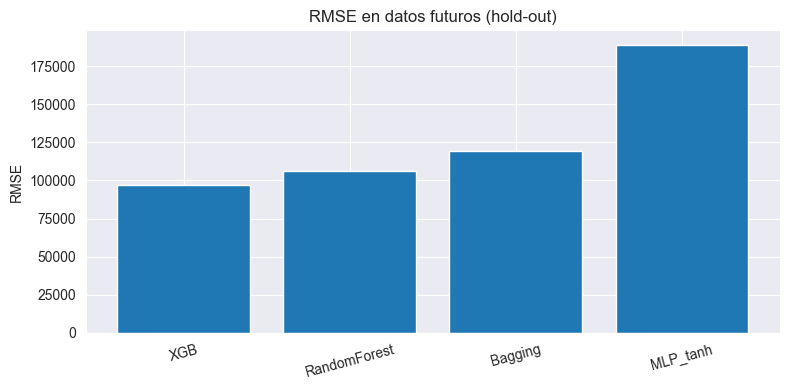

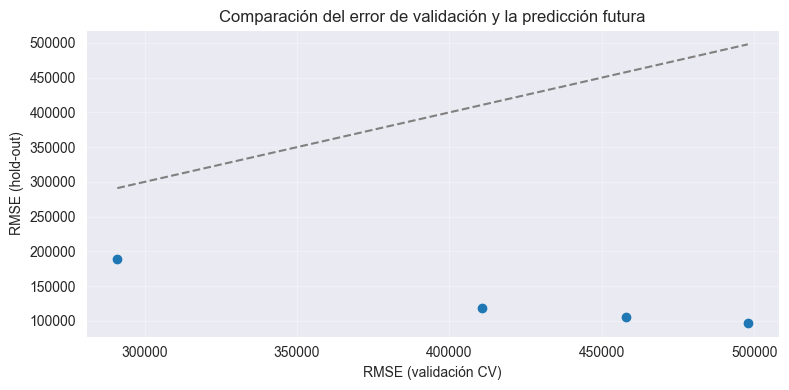

In [7]:
# # =========================================================
# # === HOLD-OUT TEST (último mes o último año) ===
# # =========================================================
# print("\n🧭 Hold-out test — predicción en el último fragmento de datos")
#
from sklearn.metrics import r2_score

try:
    from sklearn.metrics import root_mean_squared_error as _rmse_fn
    def RMSE(y_true, y_pred):
        return _rmse_fn(y_true, y_pred)
except Exception:
    from sklearn.metrics import mean_squared_error
    def RMSE(y_true, y_pred):
        return mean_squared_error(y_true, y_pred, squared=False)

# =========================================================
# === HOLD-OUT TEST (último mes o año) ===
# =========================================================
print("\n🧭 Hold-out test — predicción en el último fragmento de datos")

holdout_results = []

for name, model in best_models.items():
    print(model)
    print(f"\n🔮 {name}: entrenamos con {len(X_train)} observaciones, probamos con {len(X_test)}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse_val = RMSE(y_test, y_pred)
    r2_val = r2_score(y_test, y_pred)

    holdout_results.append({
        "Model": name,
        "RMSE_holdout": rmse_val,
        "R2_holdout": r2_val
    })
    print(f"✅ RMSE: {rmse_val:,.0f} | R²: {r2_val:.3f}")

holdout_df = pd.DataFrame(holdout_results).sort_values("RMSE_holdout")
display(holdout_df)

# =========================================================
# === COMPARACIÓN DE MODELOS (val vs hold-out) ===
# =========================================================
# 1) Unificamos el nombre de la columna de CV: RMSE_val_mean -> RMSE_val
summary_df_fixed = summary_df.rename(columns={"RMSE_val_mean": "RMSE_val"})

# 2) MERGE usando el nombre corregido
merged_df = summary_df_fixed.merge(
    holdout_df[["Model", "RMSE_holdout"]],
    on="Model"
).sort_values("RMSE_holdout")

display(merged_df)

# =========================================================
# === GRÁFICOS ===
# =========================================================
plt.figure(figsize=(8, 4))
plt.bar(holdout_df["Model"], holdout_df["RMSE_holdout"])
plt.title("RMSE en datos futuros (hold-out)")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
# x = RMSE de CV (tras unificar nombre), y = RMSE de hold-out
plt.scatter(merged_df["RMSE_val"], merged_df["RMSE_holdout"])
# línea y = x (usa LA MISMA columna que el scatter)
x_min, x_max = merged_df["RMSE_val"].min(), merged_df["RMSE_val"].max()
plt.plot([x_min, x_max], [x_min, x_max], "--", color="gray")

plt.xlabel("RMSE (validación CV)")
plt.ylabel("RMSE (hold-out)")
plt.title("Comparación del error de validación y la predicción futura")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [8]:
from pathlib import Path
import warnings

import pandas as pd

warnings.filterwarnings("ignore")

DATA_PATH = Path("result_total_with_lags_coded.csv")  # <- sustituye por tu ruta si es necesario
ISLAND_COL = "Isla"
TARGET_COL = "Pasajeros"
YEAR_COL = "year_norm"
TOTAL_LABEL = "Total Canarias"

print("DATA_PATH:", DATA_PATH.resolve())

df = pd.read_csv(DATA_PATH)
df_total = df[df[ISLAND_COL] == TOTAL_LABEL].copy()
assert not df_total.empty, "No hay filas para TOTAL — verifica los nombres de las islas y el total."
FEATURES = ["Fecha","month_sin","month_cos","year_norm"] + [f"lag_{i}" for i in range(1,13)] + ["roll3","roll6"]
X_total = df_total[FEATURES].values
y_total = df_total[TARGET_COL].values
print(total)


DATA_PATH: C:\projects\data_science\pasajeros_aeropuertos_canarias\canarias_dashboard\result_total_with_lags_coded.csv
               Isla       Fecha  Pasajeros     month_sin     month_cos  \
345  Total Canarias  2020-01-01    1757813  5.000000e-01  8.660254e-01   
346  Total Canarias  2020-02-01    1784677  8.660254e-01  5.000000e-01   
347  Total Canarias  2020-03-01     753290  1.000000e+00  6.123234e-17   
348  Total Canarias  2020-04-01      14783  8.660254e-01 -5.000000e-01   
349  Total Canarias  2020-05-01      34553  5.000000e-01 -8.660254e-01   
..              ...         ...        ...           ...           ...   
409  Total Canarias  2025-05-01    2016749  5.000000e-01 -8.660254e-01   
410  Total Canarias  2025-06-01    2081654  1.224647e-16 -1.000000e+00   
411  Total Canarias  2025-07-01    2320307 -5.000000e-01 -8.660254e-01   
412  Total Canarias  2025-08-01    2295039 -8.660254e-01 -5.000000e-01   
413  Total Canarias  2025-09-01    2078523 -1.000000e+00 -1.836970e

📦 Train: (49, 12, 4), Val: (8, 12, 4)

🚀 Entrenando modelo: LSTM_32

🚀 Entrenando modelo: GRU_32

🚀 Entrenando modelo: Transformer_32

🚀 Entrenando modelo: LSTM_64

🚀 Entrenando modelo: GRU_64

🚀 Entrenando modelo: Transformer_64

🚀 Entrenando modelo: LSTM_128

🚀 Entrenando modelo: GRU_128

🚀 Entrenando modelo: Transformer_128


,Model,Units,RMSE_val_scaled,MAE_val_scaled,RMSE_val_real,MAE_val_real
4,GRU_64,64,0.188962,0.162566,131002.941425,112703.752295
0,LSTM_32,32,0.193379,0.170621,134065.718611,118287.749536
2,Transformer_32,32,0.198264,0.175978,137452.052674,122002.011184
5,Transformer_64,64,0.257586,0.209830,178578.575399,145470.921442
7,GRU_128,128,0.259648,0.204598,180007.990825,141843.090617
6,LSTM_128,128,0.276034,0.230553,191368.217214,159837.137691
3,LSTM_64,64,0.315240,0.247505,218548.894528,171589.529064
8,Transformer_128,128,0.547623,0.512370,379655.014298,355215.131350
1,GRU_32,32,0.570814,0.534202,395732.870613,370350.532181


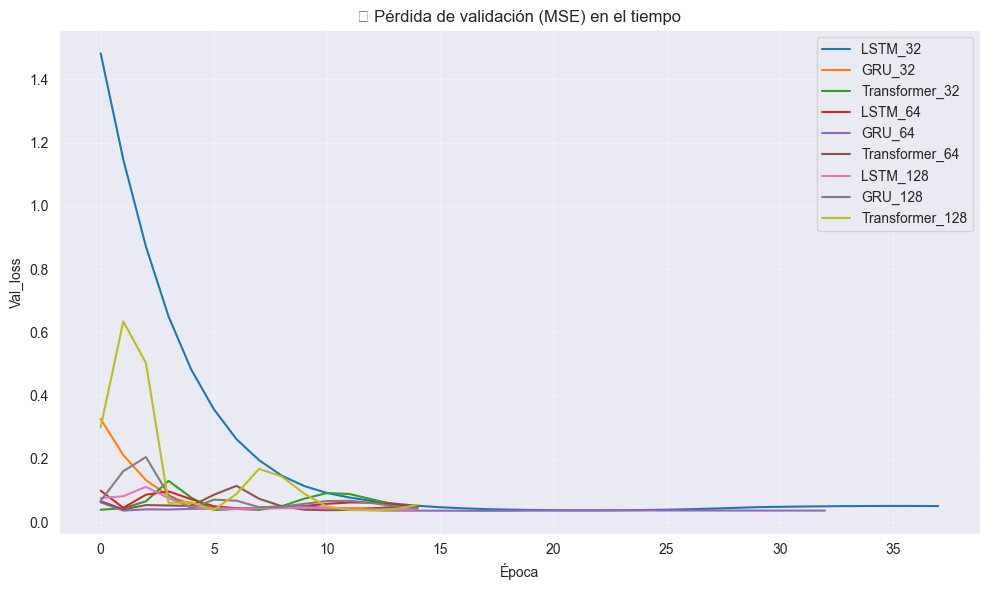

🏆 Ranking según RMSE (en escala real de pasajeros):


,Model,RMSE_val_real,MAE_val_real
4,GRU_64,131002.941425,112703.752295
0,LSTM_32,134065.718611,118287.749536
2,Transformer_32,137452.052674,122002.011184
5,Transformer_64,178578.575399,145470.921442
7,GRU_128,180007.990825,141843.090617
6,LSTM_128,191368.217214,159837.137691
3,LSTM_64,218548.894528,171589.529064
8,Transformer_128,379655.014298,355215.131350
1,GRU_32,395732.870613,370350.532181


In [9]:
# %% [code]
# =========================================================
# 🧠 Pronóstico LSTM / GRU / Transformer — pseudo GridSearch
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------------------------------------------
# 1️⃣ Datos y parámetros
# ---------------------------------------------------------
ISLAND_NAME = "Total Canarias"
DATE_COL    = "Fecha"
TARGET_COL  = "Pasajeros"

WIN         = 12        # longitud de la secuencia
VAL_FRAC    = 0.15      # validación = últimos 15%
EPOCHS      = 150
BATCH_SIZE  = 32
SEED        = 42
tf.keras.utils.set_random_seed(SEED)
np.random.seed(SEED)

df = df_total[df_total["Isla"] == ISLAND_NAME].copy()
df[DATE_COL] = pd.to_datetime(df[DATE_COL])
df = df.sort_values(DATE_COL).reset_index(drop=True)

# ---------------------------------------------------------
# 2️⃣ Preparación de características (sin lags)
# ---------------------------------------------------------
base_year = df[DATE_COL].dt.year.min()
df["year_norm"] = (df[DATE_COL].dt.year - base_year).astype(float)

scaler_y = StandardScaler()
df["_y_scaled"] = scaler_y.fit_transform(df[[TARGET_COL]])

df["_x_pasaj"] = df["_y_scaled"]
X_all = df[["_x_pasaj", "month_sin", "month_cos", "year_norm"]].to_numpy()
y_all = df["_y_scaled"].to_numpy()

# ---------------------------------------------------------
# 3️⃣ Creación de secuencias
# ---------------------------------------------------------
def make_sequences(X, y, win):
    Xs, ys = [], []
    for i in range(win, len(X)):
        Xs.append(X[i-win:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = make_sequences(X_all, y_all, WIN)
n_val = int(len(X_seq) * VAL_FRAC)
X_train, y_train = X_seq[:-n_val], y_seq[:-n_val]
X_val, y_val     = X_seq[-n_val:], y_seq[-n_val:]
print(f"📦 Train: {X_train.shape}, Val: {X_val.shape}")

input_shape = (WIN, X_train.shape[-1])

# ---------------------------------------------------------
# 4️⃣ Definiciones de modelos
# ---------------------------------------------------------
def build_lstm(input_shape, units=64):
    inp = layers.Input(shape=input_shape)
    x = layers.LSTM(units)(inp)
    x = layers.Dense(units//2, activation="relu")(x)
    out = layers.Dense(1)(x)
    m = models.Model(inp, out, name=f"LSTM_{units}")
    m.compile(optimizer="adam", loss="mse")
    return m

def build_gru(input_shape, units=64):
    inp = layers.Input(shape=input_shape)
    x = layers.GRU(units)(inp)
    x = layers.Dense(units//2, activation="relu")(x)
    out = layers.Dense(1)(x)
    m = models.Model(inp, out, name=f"GRU_{units}")
    m.compile(optimizer="adam", loss="mse")
    return m

def build_transformer(input_shape, units=64):
    inp = layers.Input(shape=input_shape)
    x = layers.Dense(units)(inp)
    attn = layers.MultiHeadAttention(num_heads=2, key_dim=units//2)(x, x)
    x = layers.Add()([x, attn])
    x = layers.LayerNormalization()(x)
    ff = layers.Dense(units*2, activation="relu")(x)
    ff = layers.Dense(units)(ff)  # ajuste del tamaño
    x = layers.Add()([x, ff])
    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(units//2, activation="relu")(x)
    out = layers.Dense(1)(x)
    m = models.Model(inp, out, name=f"Transformer_{units}")
    m.compile(optimizer="adam", loss="mse")
    return m

# ---------------------------------------------------------
# 5️⃣ Pseudo-GridSearch: diferentes cantidades de neuronas
# ---------------------------------------------------------
UNIT_SIZES = [32, 64, 128]
cb = [
    callbacks.EarlyStopping(patience=15, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.5, patience=8)
]

results = []
histories = {}

for units in UNIT_SIZES:
    for builder, label in [
        (build_lstm, "LSTM"),
        (build_gru, "GRU"),
        (build_transformer, "Transformer")
    ]:
        name = f"{label}_{units}"
        print(f"\n🚀 Entrenando modelo: {name}")
        model = builder(input_shape, units)
        hist = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            verbose=0,
            callbacks=cb
        )
        histories[name] = hist

        # predicciones y métricas
        y_pred = model.predict(X_val, verbose=0)
        rmse = root_mean_squared_error(y_val, y_pred)
        mae  = mean_absolute_error(y_val, y_pred)
        results.append({
            "Model": name,
            "Units": units,
            "RMSE_val_scaled": rmse,
            "MAE_val_scaled": mae
        })

# ---------------------------------------------------------
# 6️⃣ Resultados
# ---------------------------------------------------------
results_df = pd.DataFrame(results)
results_df["RMSE_val_real"] = results_df["RMSE_val_scaled"] * scaler_y.scale_[0]
results_df["MAE_val_real"]  = results_df["MAE_val_scaled"] * scaler_y.scale_[0]
display(results_df.sort_values("RMSE_val_real"))

# ---------------------------------------------------------
# 7️⃣ Gráfico de pérdidas de validación (loss)
# ---------------------------------------------------------
plt.figure(figsize=(10,6))
for name, hist in histories.items():
    plt.plot(hist.history["val_loss"], label=name)
plt.title("📉 Pérdida de validación (MSE) en el tiempo")
plt.xlabel("Época")
plt.ylabel("Val_loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 8️⃣ Ranking de modelos según RMSE (cuanto menor, mejor)
# ---------------------------------------------------------
print("🏆 Ranking según RMSE (en escala real de pasajeros):")
display(results_df.sort_values("RMSE_val_real")[["Model", "RMSE_val_real", "MAE_val_real"]])


🏆 El mejor modelo LSTM es: LSTM_32 (units=32)
🚀 Entrenando nuevamente el modelo final LSTM_32 con todos los datos...
Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 373ms/step - loss: 0.6542 - val_loss: 0.3255 - learning_rate: 0.0010
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.5715 - val_loss: 0.2299 - learning_rate: 0.0010
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.5074 - val_loss: 0.1683 - learning_rate: 0.0010
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.4547 - val_loss: 0.1266 - learning_rate: 0.0010
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.4110 - val_loss: 0.0965 - learning_rate: 0.0010
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.3730 - val_loss: 0.0751 - learning_rate: 0.0010
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.3386 - val_loss: 0.0608 - learning_rate: 0.0010
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.3077 - val_loss: 0.0518 - learning_rate: 0.0010
Epoch 9/150
2

✅ Guardado el mejor modelo LSTM en: models/lstm_best.h5
✅ Guardado scaler_y en: models/scaler_y.pkl


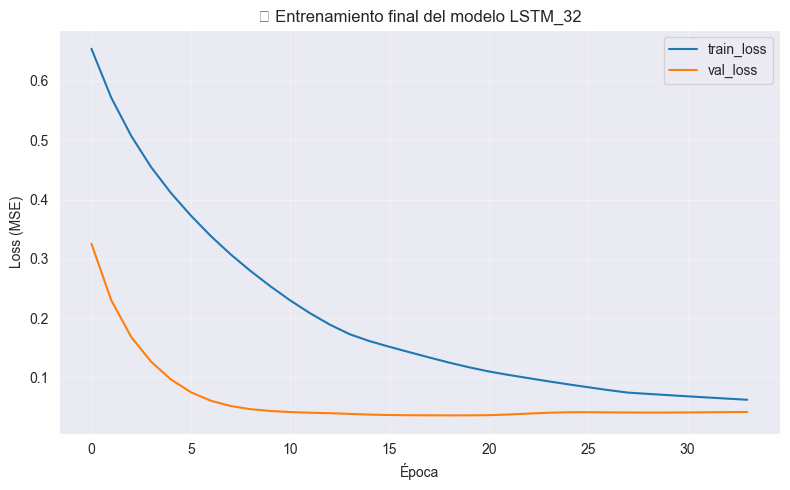

In [10]:
# %% [code]
# =========================================================
# 💾 GUARDADO DEL MEJOR MODELO LSTM + SCALER
# =========================================================
import os
import joblib
from tensorflow.keras.models import load_model

# --- Asegúrate de que la carpeta models exista ---
os.makedirs("models", exist_ok=True)

# --- Encontrar el mejor modelo LSTM de la tabla de resultados ---
best_lstm_row = results_df[results_df["Model"].str.startswith("LSTM")].sort_values("RMSE_val_scaled").iloc[0]
best_lstm_name = best_lstm_row["Model"]
best_units = int(best_lstm_name.split("_")[1])
print(f"🏆 El mejor modelo LSTM es: {best_lstm_name} (units={best_units})")

# --- Reconstruir el mismo modelo ---
lstm_best = build_lstm(input_shape, units=best_units)

# --- Reentrenar solo el mejor modelo (para obtener los pesos finales) ---
print(f"🚀 Entrenando nuevamente el modelo final {best_lstm_name} con todos los datos...")
cb_final = [
    callbacks.EarlyStopping(patience=15, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.5, patience=8)
]
history_best = lstm_best.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks=cb_final
)

# --- Guardar el modelo y el scaler ---
lstm_best.save("models/lstm_best.h5")
print("✅ Guardado el mejor modelo LSTM en: models/lstm_best.h5")

joblib.dump(scaler_y, "models/scaler_y.pkl")
print("✅ Guardado scaler_y en: models/scaler_y.pkl")

# --- (opcional) gráfico de pérdidas del entrenamiento ---
plt.figure(figsize=(8,5))
plt.plot(history_best.history["loss"], label="train_loss")
plt.plot(history_best.history["val_loss"], label="val_loss")
plt.title(f"📉 Entrenamiento final del modelo {best_lstm_name}")
plt.xlabel("Época")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


➡️ Datos de entrada: 69 observaciones


,Isla,Fecha,Pasajeros,month_sin,month_cos,year_norm,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,roll3,roll6
66,Total Canarias,2025-07-01,2320307,-0.500000,-8.660254e-01,6,2081654.0,2016749.0,2229428.0,2439527.0,2231870.0,2200971.0,2439631.0,2333838.0,2285857.0,2009806.0,2179842.0,2182178.0,2.109277e+06,2.200033e+06
67,Total Canarias,2025-08-01,2295039,-0.866025,-5.000000e-01,6,2320307.0,2081654.0,2016749.0,2229428.0,2439527.0,2231870.0,2200971.0,2439631.0,2333838.0,2285857.0,2009806.0,2179842.0,2.139570e+06,2.219922e+06
68,Total Canarias,2025-09-01,2078523,-1.000000,-1.836970e-16,6,2295039.0,2320307.0,2081654.0,2016749.0,2229428.0,2439527.0,2231870.0,2200971.0,2439631.0,2333838.0,2285857.0,2009806.0,2.232333e+06,2.230451e+06


✅ Modelo XGB entrenado con datos históricos
🗓️ Última fecha conocida: 2025-09-01
📈 Número de meses a pronosticar: 15
✅ Pronóstico realizado hasta 2026-12-01
➡️ Longitud total de la tabla tras ampliación: 84 filas

📋 Últimos 6 meses históricos + primeros 6 meses pronosticados:


,Fecha,Pasajeros,Phase
0,2025-04-01,2229428.00,History
1,2025-05-01,2016749.00,History
2,2025-06-01,2081654.00,History
3,2025-07-01,2320307.00,History
4,2025-08-01,2295039.00,History
5,2025-09-01,2078523.00,History
6,2025-10-01,2318121.50,Forecast
7,2025-11-01,2349765.25,Forecast
8,2025-12-01,2368527.00,Forecast
9,2026-01-01,2293970.75,Forecast


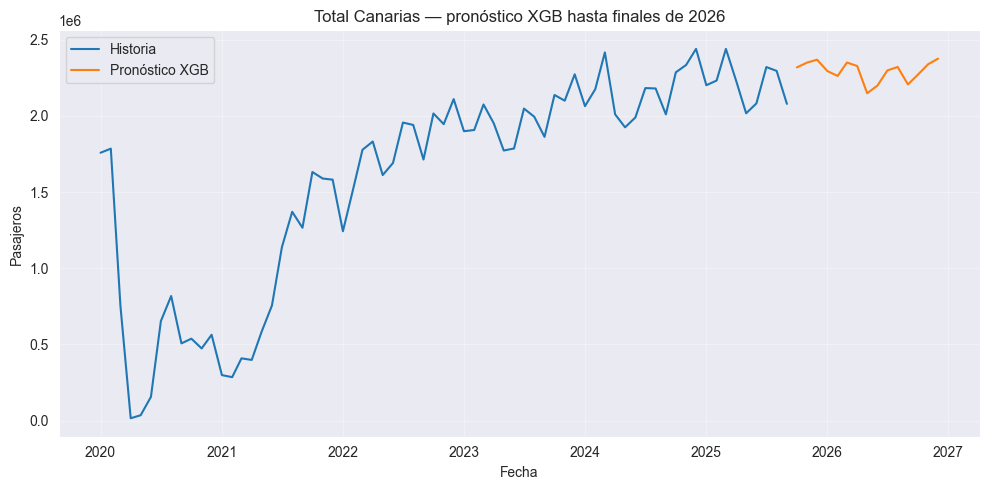


📈 Últimos 12 meses del pronóstico:


,Fecha,Pasajeros,roll3,roll6,lag_1,lag_2,lag_3
72,2026-01-01,2293970.75,2.345471e+06,2.288380e+06,2368527.00,2349765.25,2318121.50
73,2026-02-01,2261853.00,2.337421e+06,2.283991e+06,2293970.75,2368527.00,2349765.25
74,2026-03-01,2349999.00,2.308117e+06,2.278460e+06,2261853.00,2293970.75,2368527.00
75,2026-04-01,2327319.25,2.301941e+06,2.323706e+06,2349999.00,2261853.00,2293970.75
76,2026-05-01,2148144.00,2.313057e+06,2.325239e+06,2327319.25,2349999.00,2261853.00
77,2026-06-01,2198464.00,2.275154e+06,2.291636e+06,2148144.00,2327319.25,2349999.00
78,2026-07-01,2298099.50,2.224642e+06,2.263292e+06,2198464.00,2148144.00,2327319.25
79,2026-08-01,2320976.25,2.214902e+06,2.263980e+06,2298099.50,2198464.00,2148144.00
80,2026-09-01,2206125.25,2.272513e+06,2.273834e+06,2320976.25,2298099.50,2198464.00
81,2026-10-01,2270343.50,2.275067e+06,2.249855e+06,2206125.25,2320976.25,2298099.50


In [11]:
# %% [code]
# ==============================================
# 🧭 Pronóstico iterativo XGB hasta finales de 2026
# (extiende la tabla existente df_total)
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

# === PARÁMETROS ===
ISLAND_NAME = "Total Canarias"
TARGET_COL = "Pasajeros"
DATE_COL = "Fecha"
HORIZON_END = "2026-12-01"  # último mes del pronóstico

# ==============================================
# 1️⃣ Filtramos solo Total Canarias
# ==============================================
df_total_can = df_total[df_total["Isla"] == ISLAND_NAME].copy()
df_total_can[DATE_COL] = pd.to_datetime(df_total_can[DATE_COL])
df_total_can = df_total_can.sort_values(DATE_COL).reset_index(drop=True)

print(f"➡️ Datos de entrada: {df_total_can.shape[0]} observaciones")
display(df_total_can.tail(3))

# ==============================================
# 2️⃣ Preparamos datos de entrenamiento (X_train, y_train)
# ==============================================
# lista de características
FEATURES = [
    "month_sin", "month_cos", "year_norm",
    *[f"lag_{i}" for i in range(1, 13)],
    "roll3", "roll6"
]

X_train = df_total_can[FEATURES].values
y_train = df_total_can[TARGET_COL].values

# ==============================================
# 3️⃣ Creamos el modelo XGB (con imputación y escalado del objetivo)
# ==============================================
xgb = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", XGBRegressor(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ))
])

# Escalamos y para mejorar el rendimiento con valores grandes (p. ej. pasajeros)
model = TransformedTargetRegressor(
    regressor=xgb,
    transformer=StandardScaler()
)

# Entrenamos el modelo
model.fit(X_train, y_train)
print("✅ Modelo XGB entrenado con datos históricos")

# ==============================================
# 4️⃣ Pronóstico iterativo del futuro
# ==============================================

# — Creamos una copia de la tabla para no sobrescribir el original
df_future = df_total_can.copy()

# — Obtenemos la última fecha conocida
last_date = df_future[DATE_COL].max()
print(f"🗓️ Última fecha conocida: {last_date.date()}")

# — Creamos el rango de meses futuros hasta finales de 2026
future_dates = pd.period_range(last_date, HORIZON_END, freq="M")[1:].to_timestamp()

print(f"📈 Número de meses a pronosticar: {len(future_dates)}")

# — Bucle iterativo: generamos filas nuevas mes a mes
for next_date in future_dates:
    # 1️⃣ Tomamos la última fila de la tabla (con los últimos lag_i y roll3/roll6)
    last_row = df_future.iloc[-1].copy()

    # 2️⃣ Creamos una fila nueva basada en el mes anterior
    new_row = last_row.copy()
    new_row[DATE_COL] = next_date
    new_row["Isla"] = ISLAND_NAME

    # 3️⃣ Actualizamos características de calendario
    m = next_date.month
    new_row["month_sin"] = np.sin(2 * np.pi * m / 12)
    new_row["month_cos"] = np.cos(2 * np.pi * m / 12)
    new_row["year_norm"] = (next_date.year - df_total_can[DATE_COL].dt.year.min())

    # 4️⃣ Desplazamos los lags: lag_1 = mes anterior, lag_2 = dos meses antes, etc.
    for i in range(12, 1, -1):
        new_row[f"lag_{i}"] = last_row[f"lag_{i-1}"]
    # nuevo lag_1 = último valor de pasajeros (mes anterior)
    new_row["lag_1"] = last_row[TARGET_COL]

    # 5️⃣ Actualizamos rolling (media de los últimos 3 y 6 meses)
    last_values = df_future[TARGET_COL].tail(6).values
    new_row["roll3"] = np.mean(last_values[-3:]) if len(last_values) >= 3 else np.nan
    new_row["roll6"] = np.mean(last_values[-6:]) if len(last_values) >= 6 else np.nan

    # 6️⃣ Construimos X (características) para la predicción
    X_pred = new_row[FEATURES].values.reshape(1, -1)

    # 7️⃣ Pronosticamos valor
    y_pred = model.predict(X_pred)[0]
    new_row[TARGET_COL] = y_pred

    # 8️⃣ Añadimos la nueva fila a la tabla
    df_future = pd.concat([df_future, pd.DataFrame([new_row])], ignore_index=True)

print(f"✅ Pronóstico realizado hasta {future_dates[-1].date()}")
print(f"➡️ Longitud total de la tabla tras ampliación: {len(df_future)} filas")

# ==============================================
# 5️⃣ Marcamos qué meses son pronosticados
# ==============================================
df_future["Phase"] = np.where(df_future[DATE_COL] <= last_date, "History", "Forecast")

# ==============================================
# 6️⃣ Vista previa y gráfica
# ==============================================
print("\n📋 Últimos 6 meses históricos + primeros 6 meses pronosticados:")
display(pd.concat([
    df_future[df_future["Phase"]=="History"].tail(6),
    df_future[df_future["Phase"]=="Forecast"].head(6)
], ignore_index=True)[[DATE_COL, TARGET_COL, "Phase"]])

plt.figure(figsize=(10,5))
plt.plot(df_future[df_future["Phase"]=="History"][DATE_COL],
         df_future[df_future["Phase"]=="History"][TARGET_COL],
         label="Historia", color="tab:blue")
plt.plot(df_future[df_future["Phase"]=="Forecast"][DATE_COL],
         df_future[df_future["Phase"]=="Forecast"][TARGET_COL],
         label="Pronóstico XGB", color="tab:orange")
plt.title(f"{ISLAND_NAME} — pronóstico XGB hasta finales de 2026")
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# ==============================================
# 7️⃣ Resultado final
# ==============================================
print("\n📈 Últimos 12 meses del pronóstico:")
display(df_future[df_future["Phase"]=="Forecast"].tail(12)[
    [DATE_COL, TARGET_COL, "roll3", "roll6", "lag_1", "lag_2", "lag_3"]
])


In [12]:
# %% [code]
# =========================================================
# 🧠 GUARDADO DE MODELOS — XGB + LSTM + SCALER
# =========================================================

import os
import joblib
from tensorflow.keras.models import load_model

os.makedirs("models", exist_ok=True)

# =========================================================
# === 🔹 GUARDADO DEL MODELO XGB ===
# =========================================================
try:
    xgb_best = best_models["XGB"]
    joblib.dump(xgb_best, "models/xgb_best.pkl")
    print("✅ Modelo XGB guardado en: models/xgb_best.pkl")
except Exception as e:
    print("⚠️ No se encontró el modelo XGB en best_models o error al guardar:", e)


# =========================================================
# === 🔹 GUARDADO DEL MODELO LSTM ===
# =========================================================
try:
    lstm_best.save("models/lstm_best.h5")
    print("✅ Modelo LSTM guardado en: models/lstm_best.h5")
except Exception as e:
    print("⚠️ No fue posible guardar el modelo LSTM:", e)



# =========================================================
# === 🔹 RESUMEN ===
# =========================================================
print("\n📦 ¡Modelos y scaler guardados correctamente!")
print("📁 Carpeta: ./models/")
print("├── xgb_best.pkl")
print("├── lstm_best.h5")
print("└── scaler_y.pkl")


✅ Modelo XGB guardado en: models/xgb_best.pkl
✅ Modelo LSTM guardado en: models/lstm_best.h5

📦 ¡Modelos y scaler guardados correctamente!
📁 Carpeta: ./models/
├── xgb_best.pkl
├── lstm_best.h5
└── scaler_y.pkl
